In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data= pd.read_csv('Data1\\Data1\\section 5\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser= dateparse)

In [4]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
from pmdarima import auto_arima

## Automatic parameter selection for ARIMA

In [6]:
##Account for seasonality:SARIMA
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=6, max_q=6, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_detection='ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1024.824, BIC=1039.200, Time=0.827 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1033.479, BIC=1039.229, Time=0.016 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=1022.316, BIC=1033.817, Time=0.685 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=1022.904, BIC=1034.405, Time=0.663 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=1031.508, BIC=1034.383, Time=0.023 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1022.343, BIC=1030.968, Time=0.193 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=1021.137, BIC=1035.513, Time=1.614 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=1017.166, BIC=1034.417, Time=6.826 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit A

In [7]:
print(stepwise_model.aic())

1015.842187246335


In [8]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

### train the model

In [9]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [11]:
future_forecast= stepwise_model.predict(n_periods=12)

In [15]:
future_forecast = pd.DataFrame(future_forecast, test.index,columns=['#Passengers'])

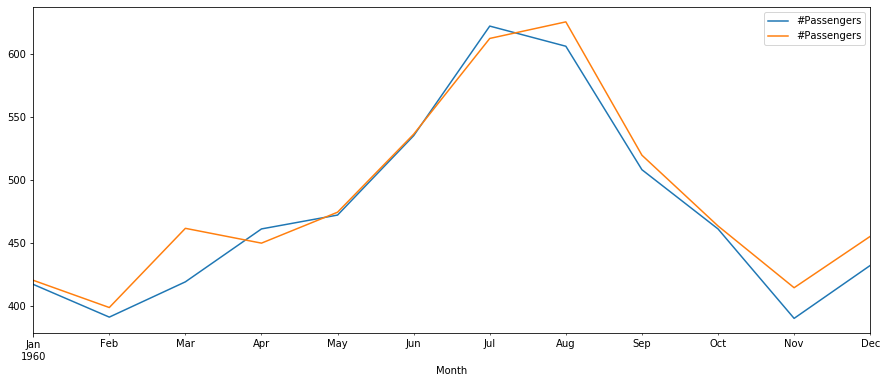

In [16]:
pd.concat([test, future_forecast], axis=1).plot()

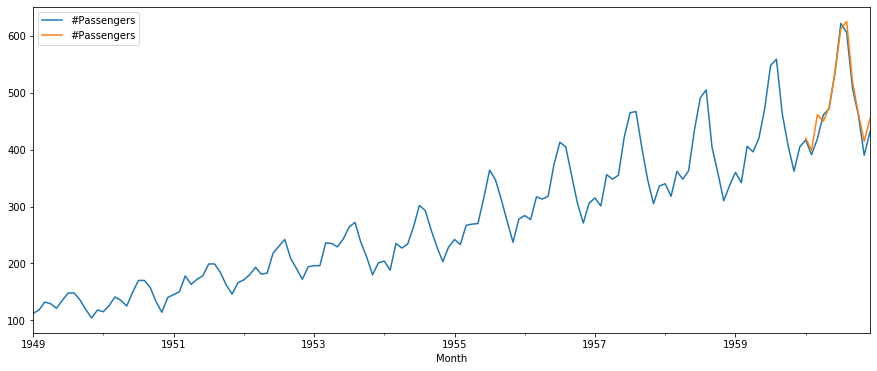

In [17]:
pd.concat([data,future_forecast], axis=1).plot()